<a href="https://colab.research.google.com/github/EUNYUGNYU/SocialTextAnalysis_exmple_04/blob/main/Sentiment_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Bag of Words Meets Bags of Popcorn

* https://www.kaggle.com/c/word2vec-nlp-tutorial

### [자연 언어 처리 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%9E%90%EC%97%B0_%EC%96%B8%EC%96%B4_%EC%B2%98%EB%A6%AC)

* 자연 언어 처리(自然言語處理) 또는 자연어 처리(自然語處理)는 인간이 발화하는 언어 현상을 기계적으로 분석해서 컴퓨터가 이해할 수 있는 형태로 만드는 자연 언어 이해 혹은 그러한 형태를 다시 인간이 이해할 수 있는 언어로 표현하는 제반 기술을 의미한다. (출처 : 위키피디아)

### 자연어처리(NLP)와 관련 된 캐글 경진대회
* [Sentiment Analysis on Movie Reviews | Kaggle](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)
* [Toxic Comment Classification Challenge | Kaggle](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge)
* [Spooky Author Identification | Kaggle](https://www.kaggle.com/c/spooky-author-identification)


## 튜토리얼 개요
### 파트1 
* 초보자를 대상으로 기본 자연어 처리를 다룬다.

### 파트2
* Word2Vec을 사용하여 모델을 학습시키는 방법과 감정분석에 단어 벡터를 사용하는 방법을 본다.


* 긍정과 부정 리뷰가 섞여있는 10만개(train, test, unlabeled)의 IMDB  감정분석 데이터 세트를 통해 목표를 달성해 본다.


### 평가 - ROC 커브(Receiver-Operating Characteristic curve)
* TPR(True Positive Rate)과 FPR(False Positive Rate)을 각각 x, y 축으로 놓은 그래프
* 민감도 TPR 
    - 1인 케이스에 대해 1로 예측한 비율
    - 암환자를 진찰해서 암이라고 진단함
* 특이도 FPR
    - 0인 케이스에 대해 1로 잘못 예측한 비율
    - 암환자가 아닌데 암이라고 진단함
   
    
* X, Y가 둘 다 [0, 1] 범위이고 (0, 0)에서 (1, 1)을 잇는 곡선이다.
* ROC 커브의 및 면적이 1에 가까울 수록(왼쪽 꼭지점에 다가갈수록) 좋은 성능

* 참고 : 
    * [New Sight :: Roc curve, AUR(AUCOC), 민감도, 특이도](http://newsight.tistory.com/53)
    * [ROC의 AUC 구하기 :: 진화하자 - 어디에도 소속되지 않기](http://adnoctum.tistory.com/121)
    * [Receiver operating characteristic - Wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
    
### Use Google's Word2Vec for movie reviews
* 자연어 텍스트를 분석해서 특정단어를 얼마나 사용했는지, 얼마나 자주 사용했는지, 어떤 종류의 텍스트인지 분류하거나 긍정인지 부정인지에 대한 감정분석, 그리고 어떤 내용인지 요약하는 정보를 구글의 Word2Vec을 통해 얻을 수 있다.
* 감정분석은 머신러닝(기계학습)에서도 어려운 주제이다. 예를 들어 풍자, 애매모호한 말, 반어법, 언어 유희로 표현들은 사람과 컴퓨터 모두에게 오해의 소지가 있기 때문이다. 여기에서는 Word2Vec을 통한 감정분석을 해보는 튜토리얼을 해본다.
* Google의 Word2Vec은 단어의 의미와 관계를 이해하는 데 도움
* 상당수의 NLP기능은 nltk모듈에 구현되어 있는데 이 모듈은 코퍼스, 함수와 알고리즘으로 구성되어 있다.
* 단어 임베딩 모형 테스트 : [Korean Word2Vec](http://w.elnn.kr/search/)

### BOW(bag of words)
* 가장 간단하지만 효과적이라 널리쓰이는 방법
* 장, 문단, 문장, 서식과 같은 입력 텍스트의 구조를 제외하고 각 단어가 이 말뭉치에 얼마나 많이 나타나는지만 헤아린다.
* 구조와 상관없이 단어의 출현횟수만 세기 때문에 텍스트를 담는 가방(bag)으로 생각할 수 있다.
* BOW는 단어의 순서가 완전히 무시 된다는 단점이 있다. 예를 들어 의미가 완전히 반대인 두 문장이 있다고 하다.
    - `it's bad, not good at all.` 
    - `it's good, not bad at all.` 
* 위 두 문장은 의미가 전혀 반대지만 완전히 동일하게 반환된다.
* 이를 보완하기 위해 n-gram을 사용하는 데 BOW는 하나의 토큰을 사용하지만 n-gram은 n개의 토큰을 사용할 수 있도록 한다.

* [Bag-of-words model - Wikipedia](https://en.wikipedia.org/wiki/Bag-of-words_model)

# 파트 1

NLP는?
NLP(자연어처리)는 텍스트 문제에 접근하기 위한 기술집합이다.
이 튜토리얼에서는 IMDB 영화 리뷰를 로딩하고 정제하고 간단한 BOW(Bag of Words) 모델을 적용하여 리뷰가 추천인지 아닌지에 대한 정확도를 예측한다.

- 즉, 텍스트 데이터를 컴퓨터가 이해할 수 있게 해줌

In [ ]:
import pandas as pd

"""
header = 0 은 파일의 첫 번째 줄에 열 이름이 있음을 나타내며 
delimiter = \t 는 필드가 탭으로 구분되는 것을 의미한다.
quoting = 3은 쌍따옴표를 무시하도록 한다.
"""
# QUOTE_MINIMAL (0), QUOTE_ALL (1), 
# QUOTE_NONNUMERIC (2) or QUOTE_NONE (3).

# 레이블인 sentiment 가 있는 학습 데이터
train = pd.read_csv('data/labeledTrainData.tsv', delimiter='\t', quoting=3)
# 레이블이 없는 테스트 데이터
test = pd.read_csv('data/testData.tsv', delimiter='\t', quoting=3)
train.shape #25000 x3 형태

(25000, 3)

In [ ]:
train.tail(3)

,id,sentiment,review
24997,"""10905_3""",0,"""Guy is a loser. Can't get girls, needs to bui..."
24998,"""10194_3""",0,"""This 30 minute documentary Buñuel made in the..."
24999,"""8478_8""",1,"""I saw this movie as a child and it broke my h..."


In [ ]:
test.shape

(25000, 2)

In [ ]:
test.tail()

,id,review
24995,"""2155_10""","""Sony Pictures Classics, I'm looking at you! S..."
24996,"""59_10""","""I always felt that Ms. Merkerson had never go..."
24997,"""2531_1""","""I was so disappointed in this movie. I am ver..."
24998,"""7772_8""","""From the opening sequence, filled with black ..."
24999,"""11465_10""","""This is a great horror film for people who do..."


In [ ]:
train.columns.values

array([' id', 'sentiment', 'review'], dtype=object)

In [ ]:
# 레이블인 'sentiment'가 없다. 이 데이터를 기계학습을 통해 예측한다.
test.columns.values

array(['id', 'review'], dtype=object)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0    id        25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [ ]:
train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
import numpy as np
train.describe(exclude=[np.number]) # 중복여부 확인

,id,review
count,25000,25000
unique,25000,24904
top,"""10545_1""","""You do realize that you've been watching the ..."
freq,1,3


In [ ]:
train['sentiment'].value_counts()

0    12500
1    12500
Name: sentiment, dtype: int64

In [ ]:
# html 태그가 섞여있기 때문에 이를 정제해줄 필요가 있음
train['review'][0][:700]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

### 데이터 정제 Data Cleaning and Text Preprocessing
데이터 정제가 필요한 이유 : 기계가 이해할 수 있는 언어로 텍스트를 정제해야 한다.

신호와 소음을 구분한다. 즉, 아웃라이어데이터로 인한 오버피팅을 방지한다.

1. BeautifulSoup(뷰티풀숩)을 통해 HTML 태그를 제거
2. 정규표현식으로 알파벳 이외의 문자를 공백으로 치환
3. NLTK 데이터를 사용해 불용어(Stopword)를 제거
4. 어간추출(스테밍 Stemming)과 음소표기법(Lemmatizing)의 개념을 이해하고 SnowballStemmer를 통해 어간을 추출


### 한국어 텍스트 전처리 이해하기
konlp --> 트위터 한국어 형태소

(출처 : [트위터 한국어 형태소 분석기](https://github.com/twitter/twitter-korean-text))

**정규화 normalization (입니닼ㅋㅋ -> 입니다 ㅋㅋ, 샤릉해 -> 사랑해)**

* 한국어를 처리하는 예시입니닼ㅋㅋㅋㅋㅋ -> 한국어를 처리하는 예시입니다 ㅋㅋ

**토큰화 tokenization**

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하는Verb, 예시Noun, 입Adjective, 니다Eomi ㅋㅋKoreanParticle

**어근화 stemming (입니다 -> 이다)**

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하다Verb, 예시Noun, 이다Adjective, ㅋㅋKoreanParticle


**어구 추출 phrase extraction** 

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어, 처리, 예시, 처리하는 예시

Introductory Presentation: [Google Slides](https://docs.google.com/presentation/d/10CZj8ry03oCk_Jqw879HFELzOLjJZ0EOi4KJbtRSIeU/)

* 뷰티풀숩이 설치되지 않았다면 우선 설치해 준다.
```
!pip install BeautifulSoup4
```

In [ ]:
# 설치 및 버전확인
!pip show BeautifulSoup4

Name: beautifulsoup4
Version: 4.6.0
Summary: Screen-scraping library
Home-page: http://www.crummy.com/software/BeautifulSoup/bs4/
Author: Leonard Richardson
Author-email: leonardr@segfault.org
License: MIT
Location: /usr/local/lib/python3.8/dist-packages
Requires: 
Required-by: bs4, feedfinder2, konlpy, newspaper3k, treform


In [ ]:
from bs4 import BeautifulSoup

example1 = BeautifulSoup(train['review'][0], "lxml")
print(train['review'][0][:700])
example1.get_text()[:700] # html 태그는 사라짐. 특수문자는 남아있음.

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [ ]:
# 정규표현식(regular expression)을 사용해서 특수문자를 제거
import re
# 소문자와 대문자가 아닌 것은 공백으로 대체한다.
letters_only = re.sub('[^a-zA-Z]', ' ', example1.get_text())
letters_only

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

In [ ]:
# 모두 소문자로 변환한다. 대문자와 소문자를 컴퓨터에서는 다르게 인식하기 때문이다.
lower_case = letters_only.lower()
# 문자를 나눈다. => 토큰화 (공백기준)
words = lower_case.split()
print(len(words))
words[:10] # 첫번째 문장은 437개의 단어. 중복된 단어도 있음

437


['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

### 불용어 제거(Stopword Removal)

일반적으로 코퍼스에서 자주 나타나는 단어는 학습 모델로서 학습이나 예측 프로세스에 실제로 기여하지 않아 다른 텍스트와 구별하지 못한다. 예를 들어 조사, 접미사, i, me, my, it, this, that, is, are 등 과 같은 단어는 빈번하게 등장하지만 실제 의미를 찾는데 큰 기여를 하지 않는다. Stopwords는 "to"또는 "the"와 같은 용어를 포함하므로 사전 처리 단계에서 제거하는 것이 좋다. NLTK에는 153 개의 영어 불용어가 미리 정의되어 있다. 17개의 언어에 대해 정의되어 있으며 한국어는 없다.


### NLTK data 설치 
* http://corazzon.github.io/nltk_data_install 

In [ ]:
# 텍스트 데이터 전처리를 위해 다음을 다운로드 해야함
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')[:10]

LookupError: ignored

In [ ]:
# stopwords 를 제거한 토큰들
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10] #아끼와는 달리 첫 문장 219개의 단어로 이루어진 것이 확인됨

### 스테밍(어간추출, 형태소 분석)
출처 : [어간 추출 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%96%B4%EA%B0%84_%EC%B6%94%EC%B6%9C)


* 어간 추출(語幹 抽出, 영어: stemming)은 어형이 변형된 단어로부터 접사 등을 제거하고 그 단어의 어간을 분리해 내는 것
* "message", "messages", "messaging" 과 같이 복수형, 진행형 등의 문자를 같은 의미의 단어로 다룰 수 있도록 도와준다.
* stemming(형태소 분석): 여기에서는 NLTK에서 제공하는 형태소 분석기를 사용한다. 포터 형태소 분석기는 보수적이고 랭커스터 형태소 분석기는 좀 더 적극적이다. 형태소 분석 규칙의 적극성 때문에 랭커스터 형태소 분석기는 더 많은 동음이의어 형태소를 생산한다. [참고 : 모두의 데이터 과학 with 파이썬(길벗)](http://www.gilbut.co.kr/book/bookView.aspx?bookcode=BN001787)

In [ ]:
# 포터 스태머의 사용 예
stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem('maximum'))
print("The stemmed form of running is: {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(stemmer.stem("run")))

maximum
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [ ]:
# 랭커스터 스태머의 사용 예
from nltk.stem.lancaster import LancasterStemmer

lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem('maximum'))
print("The stemmed form of running is: {}".format(lancaster_stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(lancaster_stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(lancaster_stemmer.stem("run")))

maxim
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [ ]:
# 처리 전 단어
words[:10]

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [ ]:
#SnowballStemmer를 사용한 어간 추출
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
words = [stemmer.stem(w) for w in words]
# 처리 후 단어
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

### Lemmatization 음소표기법

언어학에서 음소 표기법 (또는 lemmatization)은 단어의 보조 정리 또는 사전 형식에 의해 식별되는 단일 항목으로 분석 될 수 있도록 굴절 된 형태의 단어를 그룹화하는 과정이다. 
예를 들어 동음이의어가 문맥에 따라 다른 의미를 갖는데 
<pre>
1) *배*가 맛있다. 
2) *배*를 타는 것이 재미있다. 
3) 평소보다 두 *배*로 많이 먹어서 *배*가 아프다.
</pre>
위에 있는 3개의 문장에 있는 "배"는 모두 다른 의미를 갖는다. <br/>
Lemmatization은 이때 앞뒤 문맥을 보고 단어의 의미를 식별하는 것이다.
영어에서 meet는 meeting으로 쓰였을 때 회의를 뜻하지만 meet 일 때는 만나다는 뜻을 갖는데 그 단어가 명사로 쓰였는지 동사로 쓰였는지에 따라 적합한 의미를 갖도록 추출하는 것이다.

* 참고 : 
    - [Stemming and lemmatization](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)
    - [Lemmatisation - Wikipedia](https://en.wikipedia.org/wiki/Lemmatisation)

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

print(wordnet_lemmatizer.lemmatize('fly'))
print(wordnet_lemmatizer.lemmatize('flies'))

words = [wordnet_lemmatizer.lemmatize(w) for w in words]
# 처리 후 단어
words[:10]

fly
fly


['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

# 문자열 처리
*  위에서 간략하게 살펴본 내용을 바탕으로 문자열을 처리해 본다.

In [ ]:
def review_to_words( raw_review ):
    # 1. HTML 제거
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. 소문자 변환
    words = letters_only.lower().split()
    # 4. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다.
    # stopwords 를 세트로 변환한다.
    stops = set(stopwords.words('english'))
    # 5. Stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 6. 어간추출
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. 공백으로 구분된 문자열로 결합하여 결과를 반환
    return( ' '.join(stemming_words) )

In [ ]:
clean_review = review_to_words(train['review'][2])
clean_review

'film start manag nichola bell give welcom investor robert carradin primal park secret project mutat primal anim use fossil dna like jurassik park scientist resurrect one natur fearsom predat sabretooth tiger smilodon scientif ambit turn dead howev high voltag fenc open creatur escap begin savag stalk prey human visitor tourist scientif meanwhil youngster enter restrict area secur center attack pack larg pre histor anim deadlier bigger addit secur agent staci haiduk mate brian wimmer fight hard carnivor smilodon sabretooth cours real star star astound terrifi though convinc giant anim savag stalk prey group run afoul fight one natur fearsom predat furthermor third sabretooth danger slow stalk victim movi deliv good lot blood gore behead hair rais chill full scare sabretooth appear mediocr special effect stori provid excit stir entertain result quit bore giant anim major made comput generat seem total lousi middl perform though player react appropri becom food actor give vigor physic pe

In [ ]:
# 첫 번째 리뷰를 대상으로 전처리 해줬던 내용을 전체 텍스트 데이터를 대상으로 처리한다.
# 전체 리뷰 데이터 수 가져오기
num_reviews = train['review'].size
num_reviews

25000

In [ ]:
"""
clean_train_reviews = []
캐글 튜토리얼에는 range가 xrange로 되어있지만 
여기에서는 python3를 사용하기 때문에 range를 사용했다.
"""
# for i in range(0, num_reviews):
#     clean_train_reviews.append( review_to_words(train['review'][i]))
"""
하지만 위 코드는 어느 정도 실행이 되고 있는지 알 수가 없어서
5000개 단위로 상태를 찍도록 개선했다.
"""
# clean_train_reviews = []
# for i in range(0, num_reviews):
#     if (i + 1)%5000 == 0:
#         print('Review {} of {} '.format(i+1, num_reviews))
#     clean_train_reviews.append(review_to_words(train['review'][i]))
    
"""
그리고 코드를 좀 더 간결하게 하기 위해 for loop를 사용하는 
대신 apply를 사용하도록 개선
"""    
%time train['review_clean'] = train['review'].apply(review_to_words)

CPU times: user 37 s, sys: 387 ms, total: 37.4 s
Wall time: 37.9 s


'\n코드는 한 줄로 간결해 졌지만 여전히 오래 걸림\n'

In [ ]:
train['review_clean'][100]

'uk edit show rather less extravag us version person concern get new kitchen perhap bedroom bathroom wonder grate got us version show everyth realiti tv instead make improv hous occup could afford entir hous get rebuilt know show tri show lousi welfar system exist us beg hard enough receiv rather vulgar product placement take place particular sear also uncal rsther turn one famili depriv area potenti millionair would far better help communiti whole instead spend hundr thousand dollar one home build someth whole communiti perhap place diy power tool borrow return along build materi everyon benefit want give one person caus enorm resent among rest local communiti still live run hous'

In [ ]:
# 참고 : http://www.racketracer.com/2016/07/06/pandas-in-parallel/. apply 사용시보다 빠름
from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # 키워드 항목 중 workers 파라메터를 꺼냄
    workers = kwargs.pop('workers')
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes=workers)
    # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
            for d in np.array_split(df, workers)])
    pool.close()
    # 작업 결과를 합쳐서 반환
    return pd.concat(list(result))

In [ ]:
%time clean_train_reviews = apply_by_multiprocessing(\
    train['review'], review_to_words, workers=4)  

CPU times: user 64.6 ms, sys: 86.3 ms, total: 151 ms
Wall time: 10.5 s


In [ ]:
# 테스트 데이터에서도 잘 되었는지 확인
%time clean_test_reviews = apply_by_multiprocessing(\ 
    test['review'], review_to_words, workers=4)    

CPU times: user 64.8 ms, sys: 91.2 ms, total: 156 ms
Wall time: 10.4 s


### 워드 클라우드
- 단어의 빈도 수 데이터를 가지고 있을 때 이용할 수 있는 시각화 방법
- 단순히 빈도 수를 표현하기 보다는 상관관계나 유사도 등으로 배치하는 게 더 의미 있기 때문에 큰 정보를 얻기는 어렵다.

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# %matplotlib inline 설정을 해주어야지만 노트북 안에 그래프가 디스플레이 된다.
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

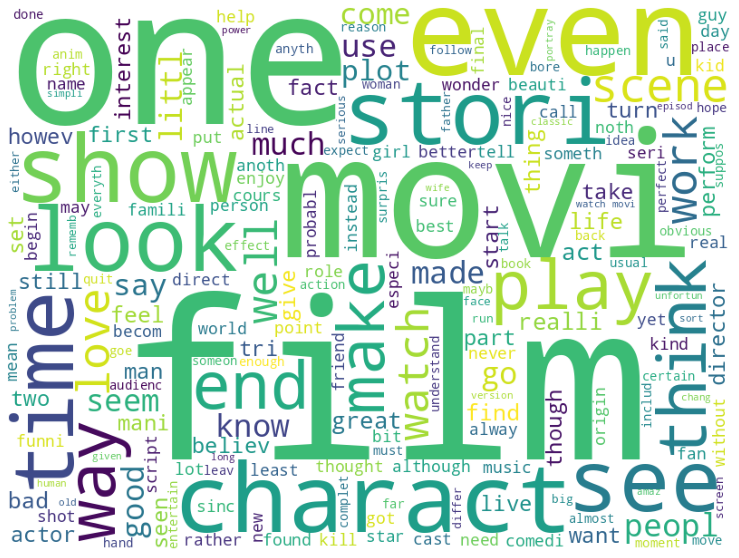

CPU times: user 16.3 s, sys: 643 ms, total: 17 s
Wall time: 17.1 s


In [ ]:
# 학습 데이터의 모든 단어에 대한 워드 클라우드를 그려본다.
%time displayWordCloud(' '.join(clean_train_reviews))

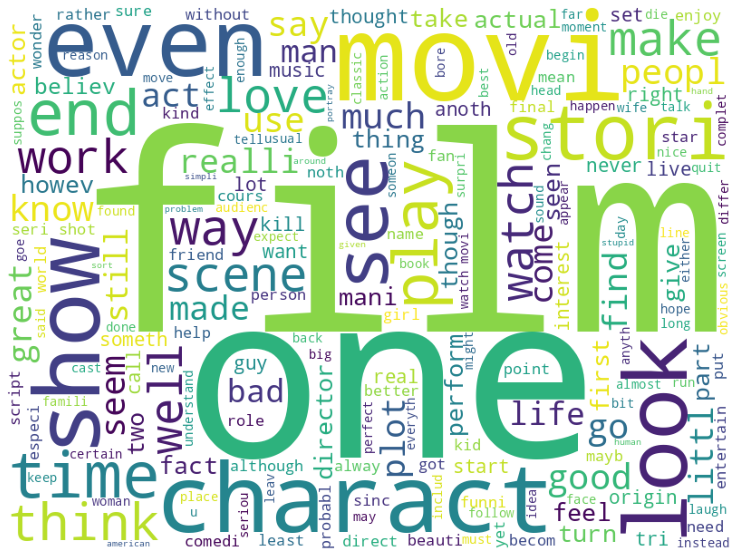

CPU times: user 15.9 s, sys: 588 ms, total: 16.5 s
Wall time: 16.7 s


In [ ]:
# 테스트 데이터의 모든 단어에 대한 워드 클라우드를 그려본다.
%time displayWordCloud(' '.join(clean_test_reviews))

In [ ]:
# 단어 수
train['num_words'] = clean_train_reviews.apply(lambda x: len(str(x).split()))
# 중복을 제거한 단어 수
train['num_uniq_words'] = clean_train_reviews.apply(lambda x: len(set(str(x).split())))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0    id             25000 non-null  object
 1   sentiment       25000 non-null  int64 
 2   review          25000 non-null  object
 3   review_clean    25000 non-null  object
 4   num_words       25000 non-null  int64 
 5   num_uniq_words  25000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


In [ ]:
# 첫 번째 리뷰에 
x = clean_train_reviews[0]
x = str(x).split()
print(len(x))
x[:10]

219


['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

리뷰별 단어 평균 값 : 119.52356
리뷰별 단어 중간 값 89.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


리뷰별 고유 단어 평균 값 : 94.05756
리뷰별 고유 단어 중간 값 74.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '리뷰별 고유한 단어 수 분포')

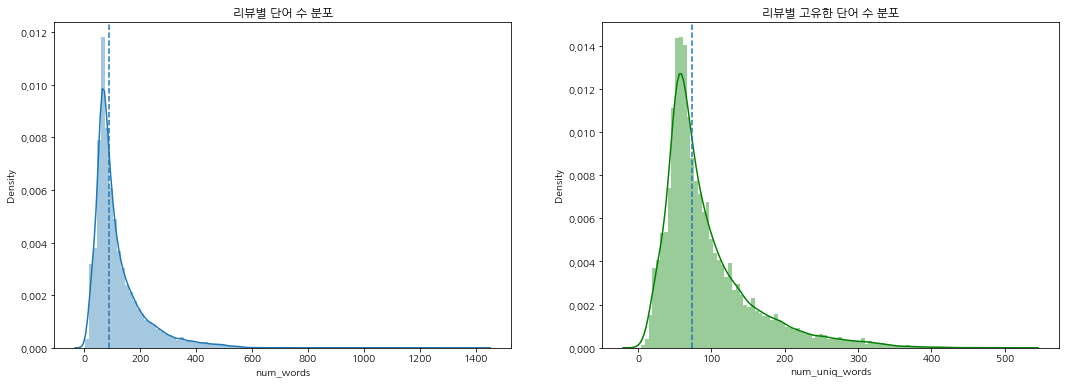

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(18, 6)
print('리뷰별 단어 평균 값 :', train['num_words'].mean())
print('리뷰별 단어 중간 값', train['num_words'].median())
sns.distplot(train['num_words'], bins=100, ax=axes[0])
axes[0].axvline(train['num_words'].median(), linestyle='dashed')
axes[0].set_title('리뷰별 단어 수 분포')

print('리뷰별 고유 단어 평균 값 :', train['num_uniq_words'].mean()) # 중복제거
print('리뷰별 고유 단어 중간 값', train['num_uniq_words'].median()) # 중복제거
sns.distplot(train['num_uniq_words'], bins=100, color='g', ax=axes[1])
axes[1].axvline(train['num_uniq_words'].median(), linestyle='dashed')
axes[1].set_title('리뷰별 고유한 단어 수 분포')

### [Bag-of-words model - Wikipedia](https://en.wikipedia.org/wiki/Bag-of-words_model)

다음의 두 문장이 있다고 하자,
```
(1) John likes to watch movies. Mary likes movies too.
(2) John also likes to watch football games.
```
위 두 문장을 토큰화 하여 가방에 담아주면 다음과 같다.

```
[
    "John",
    "likes",
    "to",
    "watch",
    "movies",
    "Mary",
    "too",
    "also",
    "football",
    "games"
]
```

그리고 배열의 순서대로 가방에서 각 토큰이 몇 번 등장하는지 횟수를 세어준다.
```
(1) [1, 2, 1, 1, 2, 1, 1, 0, 0, 0]
(2) [1, 1, 1, 1, 0, 0, 0, 1, 1, 1]
```
=> 머신러닝 알고리즘이 이해할 수 있는 형태로 바꿔주는 작업이다. (벡터화)
텍스트를 전처리까지 모두 해주고 진행해줘야 한다.

BoW의 단점은 단어의 순서를 보려하지 못한다는 것이다. 이를 보완하기 위해 등장한 것이 n-gram 이다.

단어 가방을 n-gram을 사용해 bigram 으로 담아주면 다음과 같다.
```
[
    "John likes",
    "likes to",
    "to watch",
    "watch movies",
    "Mary likes",
    "likes movies",
    "movies too",
]
```
=> 여기에서는 CountVectorizer를 통해 위 작업을 한다.

n-gram은 0 값이 많기 때문에 비효율적이다. 보완할 수 있는 방안 (LSTM, RNN) 을 생각해본다.


### 사이킷런의 CountVectorizer를 통해 피처 생성
* 정규표현식을 사용해 토큰을 추출한다.
* 모두 소문자로 변환시키기 때문에 good, Good, gOod이 모두 같은 특성이 된다.
* 의미없는 특성을 많이 생성하기 때문에 적어도 두 개의 문서에 나타난 토큰만을 사용한다.
* min_df로 토큰이 나타날 최소 문서 개수를 지정할 수 있다.
* 주의할 것은 CountVectorizer는 단지 띄어쓰기만을 기준으로 단어를 자르는 낮은 수준의 토큰화를 진행하고 BoW를 만든다는 점이다. 이는 영어의 경우 띄어쓰기만으로 토큰화가 수행되기 때문에 문제가 없지만 한국어에 CountVectorizer를 적용하면, 조사 등의 이유로 제대로 BoW가 만들어지지 않음을 의미한다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# 튜토리얼과 다르게 파라미터 값을 수정
# 파라메터 값만 수정해도 캐글 스코어 차이가 많이 남
vectorizer = CountVectorizer(analyzer = 'word', #문자열 {‘word’, ‘char’, ‘char_wb’} 또는 함수
                             # 이 뒤로 Nome인 이유 : 이미 전처리를 해줌
                             tokenizer = None, #nltk.word_tokenize를 import하여 설정해 줄 수도 있다.
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, # 토큰이 나타날 최소 문서 개수. 최소 2번은 나타나야 함
                             ngram_range=(1, 3), #
                             max_features = 20000 #최대 몇개까지 토큰을 저장할 것인지 (단어의 빈도 순으로, 1~20000 위까지 자름)
                            )
vectorizer

CountVectorizer(max_features=20000, min_df=2, ngram_range=(1, 3))

In [ ]:
# 여기에서는 하나의 과정만 묶어주어 pipeline이 불필요 할 수도 있습니다.
# pipeline은 feature engineering의 여러 과정을 묶어 줄 때 사용합니다.
pipeline = Pipeline([
    ('vect', vectorizer),
])  

In [ ]:
%time train_data_features = pipeline.fit_transform(clean_train_reviews)
train_data_features

CPU times: user 24 s, sys: 785 ms, total: 24.8 s
Wall time: 25 s


<25000x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 2762268 stored elements in Compressed Sparse Row format>

In [ ]:
train_data_features.shape

(25000, 20000)

In [ ]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

20000


['aag',
 'aaron',
 'ab',
 'abandon',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abc',
 'abduct']

In [ ]:
# 벡터화 된 피처를 확인해 봄
import numpy as np
dist = np.sum(train_data_features, axis=0)
    
for tag, count in zip(vocab, dist):
    print(count, tag)
    
pd.DataFrame(dist, columns=vocab)

[[26 48 22 ... 59 40 23]] aag


,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi bloodbath,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu,zucker
0,26,48,22,288,24,30,29,30,125,55,...,23,52,37,89,161,31,71,59,40,23


In [ ]:
bow_df = pd.DataFrame(train_data_features.toarray(), columns=vocab)
bow_df.head()

,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi bloodbath,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu,zucker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
bow_df[bow_df.abandon>0].head()

,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi bloodbath,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu,zucker
42,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166,0,0,0,2,0,0,0,0,0,0,...,0,1,5,0,0,0,0,0,0,0
281,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 긍부정 예측하기 (감성분석)

### [랜덤 포레스트 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8)
머신러닝 알고리즘 의사결정 나무(Decision Tree)에 대해 알아보았다. 의사결정 나무는 매우 훌륭한 모델이지만, 학습 데이터에 오버피팅 하는 경향이 있다. 이러한 의사결정 트리의 오버피팅 한계를 극복하기 위한 전략으로 랜덤 포레스트(Random Forest)라는 방법을 사용한다. 랜덤 포레스트는 훈련을 통해 구성해놓은 다수의 나무들로부터 분류 결과를 취합해서 결론을 얻는, 일종의 인기 투표와 같은 방식이다.

- 랜덤 포레스트는 앙상블 머신러닝 모델이다. 다수의 의사결정 트리를 만들고, 그 트리들의 분류를 집계해서 최종적으로 분류한다.
- 오버피팅을 피하기 위해 임의(random)의 숲을 구성한다. 다수의 트리들로부터 분류를 집계하기 때문에 오버피팅이 나타나는 트리의 영향력을 줄일 수 있다.
- 모든 의사결정 트리는 학습 데이터 세트에서 임의로 하위 데이터 세트를 추출하여 생성된다. 중복을 허용하기 때문에 단일 데이터가 여러 번 선택될 수도 있다. 이 과정을 배깅(bagging)이라고 한다.
- 트리를 만들 때는 모든 속성(feature)들에서 임의로 일부를 선택하고 그 중 정보 획득량이 가장 높은 것을 기준으로 데이터를 분할한다. 만약 데이터 세트에 n개의 속성이 있는 경우 n제곱근 개수만큼 무작위로 선택하는 것이 일반적이다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기를 사용
forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2018)

In [ ]:
%time forest = forest.fit(train_data_features, train['sentiment'])

CPU times: user 56.1 s, sys: 131 ms, total: 56.2 s
Wall time: 5.14 s


In [ ]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
    forest, train_data_features, \
    train['sentiment'], cv=10, scoring='roc_auc'))
score

CPU times: user 5.63 s, sys: 2.05 s, total: 7.68 s
Wall time: 1min


0.92761104

# 예측

In [ ]:
# 위에서 정제해준 리뷰의 첫 번째 데이터를 확인
clean_test_reviews[0]

'natur film main theme mortal nostalgia loss innoc perhap surpris rate high older viewer younger one howev craftsmanship complet film anyon enjoy pace steadi constant charact full engag relationship interact natur show need flood tear show emot scream show fear shout show disput violenc show anger natur joyc short stori lend film readi made structur perfect polish diamond small chang huston make inclus poem fit neat truli masterpiec tact subtleti overwhelm beauti'

In [ ]:
# 테스트 데이터를 벡터화 함
%time test_data_features = pipeline.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

CPU times: user 5.49 s, sys: 24.5 ms, total: 5.52 s
Wall time: 5.85 s


In [ ]:
test_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# 벡터화 된 단어로 숫자가 문서에서 등장하는 횟수를 나타낸다
test_data_features[5][:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# 벡터화 하며 만든 사전에서 해당 단어가 무엇인지 찾아볼 수 있다.
# vocab = vectorizer.get_feature_names()
vocab[8], vocab[2558], vocab[2559], vocab[2560]

('abc', 'charact person', 'charact play', 'charact plot')

In [ ]:
# 테스트 데이터를 넣고 예측한다.
result = forest.predict(test_data_features)
result[:10] #긍정, 부정, 긍정... 으로 예측했다.

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

# 캐글 제출을 위해 예측결과 저장

In [ ]:
# 예측 결과를 저장하기 위해 데이터프레임에 담아 준다.
output = pd.DataFrame(data={'id':test['id'], 'sentiment':result})
output.head()

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",0
3,"""7186_2""",1
4,"""12128_7""",1


In [ ]:
output.to_csv('data/tutorial_1_BOW_{0:.5f}.csv'.format(score), index=False, quoting=3)

In [ ]:
output_sentiment = output['sentiment'].value_counts()
print(np.abs(output_sentiment[0] - output_sentiment[1]))
output_sentiment

108


0    12554
1    12446
Name: sentiment, dtype: int64

## Train, Test의 감정분류 결과 값 비교

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

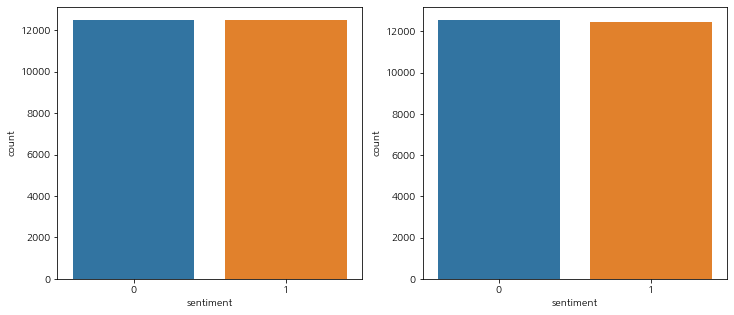

In [ ]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])

첫 번째 제출을 할 준비가 되었다.
리뷰를 다르게 정리하거나 'Bag of Words' 표현을 위해 다른 수의 어휘 단어를 선택하거나 포터 스테밍 등을 시도해 볼 수 있다.
다른 데이터세트로 NLP를 시도해 보려면 로튼 토마토(Rotten Tomatoes)를 해보는 것도 좋다.

* 로튼 토마토 데이터 셋을 사용하는 경진대회 : [Sentiment Analysis on Movie Reviews | Kaggle](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)

## 캐글 제출 결과

In [ ]:
# 파라미터를 조정해 가며 점수를 조금씩 올려본다.

# uni-gram 사용 시 캐글 점수 0.84476
# tri-gram 사용 시 캐글 점수 0.84608
# 어간추출 후 캐글 점수 0.84780
# 랜덤포레스트의 max_depth = 5 로 지정하고
# CountVectorizer의 tokenizer=nltk.word_tokenize 를 지정 후 캐글 점수 0.81460
# 랜덤포레스트의 max_depth = 5 는 다시 None으로 변경
# CountVectorizer max_features = 10000개로 변경 후 캐글 점수 0.85272
# CountVectorizer의 tokenizer=nltk.word_tokenize 를 지정 후 캐글 점수 0.85044
# CountVectorizer max_features = 10000개로 변경 후 캐글 점수 0.85612